# DBScan

Dbscan is a density based clustering algorithm. It is focused on finding neighbors by density (MinPts - short for Minimal Number of Points) on an ‘n-dimensional sphere’ with radius ɛ (eps). A cluster can be defined as the maximal set of ‘density connected points’ in the feature space. We have already learnt about this in the Outlier Detection section. Let us see the various features of how DBSCAN algorithm works.

Dbscan defines three different types of points in a cluster:

<li> Core point (or core sample): A is a core point if its neighborhood (defined by ɛ) contains at least the same number or more points than the parameter MinPts. 

<li> Border point (or neighbors of core samples): C is a border point that lies in a cluster and its neighborhood does not contain more points than MinPts, but it is still ‘density reachable’ by other points in the cluster. 

<li> Outlier (non-core samples): N is an outlier point that lies in no cluster and it is not ‘density reachable’ nor ‘density connected’ to any other point. Thus this point will have “his own cluster”.


<br>
A cluster satisfies two properties:

All points within the cluster are mutually density-connected. If a point is density-reachable from any point of the cluster, it is part of the cluster as well. 

Sci-kit Learn has an implementation of dbscan.

The first step is scaling the data, since the radius ɛ will define the neighborhoods along with MinPts. (Tip: a good scaler for the problem at hand can be Sci-kit Learn’s Robust Scaler).


### How does the Algorithm work:

1) Choose two parameters, a positive numbers - epsilon and an integer minPoints.

2) Randomly pick few points from the dataset. If there are greater than minPoints within a radius of epsilon from that point, we consider all of them to be part of a "cluster". Note that eucledian distance is used here.

3) Expand that cluster by checking all of the unchecked new points and seeing if they have greater than minPoints within a radius of epsilon, growing the cluster recursively in this manner.

4) Eventually, we run out of points to add to the cluster. We then pick a new arbitrary point and repeat the process.

5) At the end of clustering, we could end up with data points not belonging to any cluster that we call noise. 

The figure shows how 3 points which are lying within the ball of radius $\epsilon$ are considered neighbors that satisfies the criterion for the point to be considered a member of the cluster. The point is then tagged as visited. Later the ball is moved to each neighbor point and the same member determination continues till all points are visited.

<img src="../../../images/DBSCAN.PNG">

Ref: https://en.wikipedia.org/wiki/DBSCAN

## DBScan using sklearn

We will have to specify epsilon and a natural number minPoints. Let us use values
epsilon =  0.06
and minPoints = 5.

```python
db = DBSCAN(eps=0.06, min_samples=5)
db.fit(X)
labels = db.labels_
```
<br/>

## Exercise:
 
 - Perform DBScan on the dataset and visualize the clusters
 
 <p>Use .fit and .labels_ for fitting the dbscan and accessing the cluster labels respectively.</p>


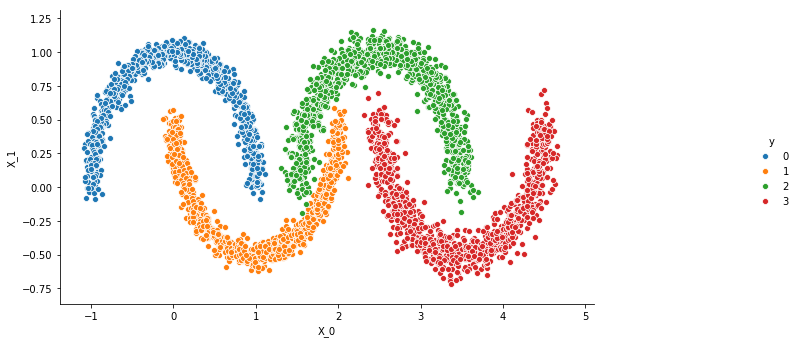

In [3]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

import numpy as np
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

N_Samples = 1000
D = 2
K = 4

X, y = make_moons(n_samples = 2*N_Samples, noise=0.05, shuffle = False)
x_vec, y_vec = make_moons(n_samples = 2*N_Samples, noise=0.08, shuffle = False)
x_vec[:,0] += 2.5
y_vec += 2
X = np.concatenate((X, x_vec), axis=0)
y = np.concatenate((y, y_vec), axis=0)

# Create a dataframe moon_df and visualize a graph g
moon_df = pd.DataFrame({'X_0':X[:,0],'X_1':X[:,1], 'y':y})
g = sns.pairplot(x_vars="X_0", y_vars="X_1", hue="y", data = moon_df)
g.fig.set_size_inches(14, 6)
sns.despine()

# Initialize a DBScan cluster with eps and minimum points
db = DBSCAN(eps=0.06, min_samples=5)



## Solution

```python
db.fit(X)
labels = db.labels_

# Create a data frame and visualize the plot.
moon_df['db_clus'] = labels
g=sns.pairplot(x_vars="X_0", y_vars="X_1", hue = "db_clus", data = moon_df)
g.fig.set_size_inches(14, 6)
sns.despine()
```


<br/><br/><br/>

## Clustering Shapes

DBScan uses density based clustering and though it appears to determine various shapes, not always is it successful. Consider two intertwined circles with a high noise of 0.2. This dataset can be generated by make_circles function in the sklearn.datasets using a noise of 0.2. DBScan on this will consider most of the data as one cluster and the rest as noise or outlier. This noise has to be the minimum say 0.05 inorder to have a valid cluster.

<img src='https://s3.amazonaws.com/rfjh/media/CKEditorImages/2017/06/20/make_circles.png'/>

<br/>

## Exercise:

 - Use DBScan with eps of 0.3 to cluster the dataset, try various minPoints and the plot the results.
 - Assign the cluster labels to the variable labels.

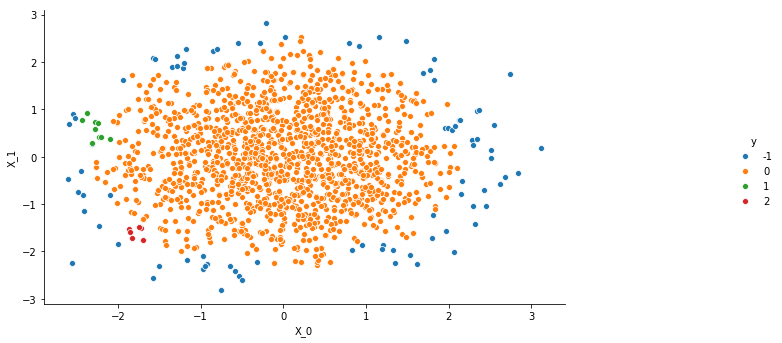

In [47]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler

n_samples = 1500
# Generate the dataset with intertwined circles
X, y = make_circles(n_samples=n_samples, factor=.5, noise=.05)

X = StandardScaler().fit_transform(X)
noisy_circles = pd.DataFrame({'X_0':X[:,0],'X_1':X[:,1], 'y':y})

# Perform DBScan on the dataset and visualize the results


## Solution

```python
db = DBSCAN(eps=0.3, min_samples=10)

db.fit(X)
labels = db.labels_
noisy_circles = pd.DataFrame({'X_0':X[:,0], 'X_1':X[:,1], 'y':labels})
g = sns.pairplot(x_vars="X_0", y_vars="X_1", hue = "y", data = noisy_circles)
g.fig.set_size_inches(14, 6)
sns.despine()
```